In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import shap

In [2]:
df = pd.read_table('classify_2fold.txt')
#选择需要的feature
target = df['edi1ing']
onehot = pd.get_dummies(df.iloc[:,:10])
data = df['MFE']
feature = pd.concat([onehot,data],axis = 1)

In [3]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2022)
dtrain = xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)
dtrain = xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)

params = {
    'nthread': 12,
    'learning_rate' : 0.1,
     'objective': 'binary:logistic'
}
params['eval_metric'] = ["error","auc","aucpr"]
num_rounds = 56
evallist = [(dtest, 'eval'), (dtrain, 'train')]


model = xgb.train(params,dtrain,num_rounds,evals=evallist,early_stopping_rounds=50)


[0]	eval-error:0.10369	eval-auc:0.94832	eval-aucpr:0.90476	train-error:0.10373	train-auc:0.94822	train-aucpr:0.90596
[1]	eval-error:0.10191	eval-auc:0.95561	eval-aucpr:0.90930	train-error:0.10243	train-auc:0.95515	train-aucpr:0.91119
[2]	eval-error:0.10129	eval-auc:0.95632	eval-aucpr:0.91220	train-error:0.10227	train-auc:0.95568	train-aucpr:0.91327
[3]	eval-error:0.09952	eval-auc:0.95803	eval-aucpr:0.91340	train-error:0.09946	train-auc:0.95753	train-aucpr:0.91450
[4]	eval-error:0.09885	eval-auc:0.95957	eval-aucpr:0.91492	train-error:0.09926	train-auc:0.95886	train-aucpr:0.91572
[5]	eval-error:0.09867	eval-auc:0.96049	eval-aucpr:0.91657	train-error:0.09914	train-auc:0.95983	train-aucpr:0.91754
[6]	eval-error:0.09748	eval-auc:0.96083	eval-aucpr:0.91716	train-error:0.09848	train-auc:0.96005	train-aucpr:0.91786
[7]	eval-error:0.09739	eval-auc:0.96124	eval-aucpr:0.91766	train-error:0.09847	train-auc:0.96053	train-aucpr:0.91845
[8]	eval-error:0.09708	eval-auc:0.96139	eval-aucpr:0.91779	train

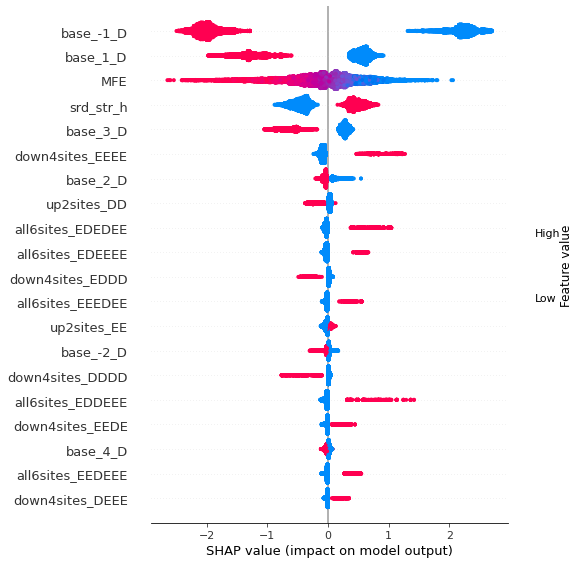

In [13]:
shap.summary_plot(shap_values,x_test,show=False)
plt.savefig("classify.shap.pdf", format='pdf',dpi=600,bbox_inches="tight")

In [14]:
mean_abs_shap_vals=np.mean(abs(shap_values),axis=0)
features=x_test.columns
shap_dict=pd.DataFrame({'feature':features,
          'mean_abs_shap':mean_abs_shap_vals})
shap_dict.to_csv("classify_2fold._shap_mean_abs.txt",index=False,sep='\t')

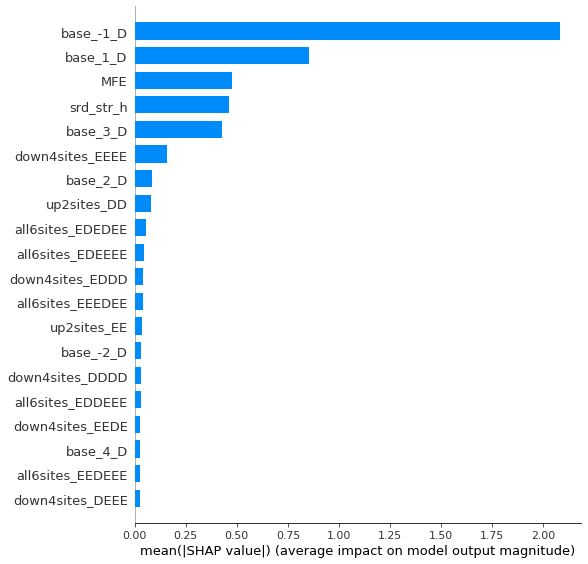

In [12]:
shap.summary_plot(shap_values, x_test, plot_type="bar",max_display=20,show=False)
plt.savefig("classify.bar.pdf", format='pdf',dpi=600,bbox_inches="tight")